In [1]:
#Import Necessary Modules
import numpy as np 
import pandas as pd 
from pandas.tseries.holiday import USFederalHolidayCalendar
import requests
import json
import csv
import matplotlib.pyplot as plt
import time 
import datetime
import os

In [44]:
# Read CSV file

dataframe = pd.read_csv('../Data/parking-citations.csv',nrows=50000,parse_dates=['Issue Date'],low_memory=False)
#dataframe.head(20) 

In [45]:
sampleDF=dataframe.drop(['Meter Id','Marked Time','Plate Expiry Date','VIN','Route','Agency'],axis=1)

#sampleDF=dataframe.sample(frac=0.1, replace=True)

In [ ]:
sampleDF.info()

In [46]:
Date_time_df=sampleDF[["Ticket number","Issue Date","Issue time"]]

In [ ]:
Date_time_df.head()

In [47]:
Date_time_df["Issue time"].isna().any()

True

In [48]:
Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False) 

In [ ]:
Date_time_df.info()

In [49]:
Date_time_df['Issue time'] = Date_time_df.loc[:,['Issue time']].astype(int)

In [50]:
Date_time_df['Issue time'] = Date_time_df['Issue time'].apply(str)

for i,time in enumerate(Date_time_df['Issue time']):

    length = len(time)
    if(length==1):
        time="000"+ time
    elif(length==2):
        time = "00" + time
    elif(length==3):
        time = "0"+ time
    else:
        time = time
    
    Date_time_df.at[i,"Issue time"] = time

In [51]:
Date_time_df['Issue time']=pd.to_datetime(Date_time_df['Issue time'],format ='%H%M').dt.time

In [52]:
Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False) 


In [ ]:
Date_time_df.info()

In [53]:
#Date_time_df['Issue Date']=pd.to_datetime(Date_time_df['Issue Date'],format='%Y%m%d %H:%M:%S')
#Date_time_df["Issue Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
#Date_time_df['Issue Date'][2]
Date_time_df['Issue Date'] = Date_time_df['Issue Date'].apply(str)


In [55]:
#Date_time_df['Issue Date'] = Date_time_df['Issue Date'].apply(str)

for i,v in enumerate (Date_time_df['Issue Date']):
    Date_time_df.at[i,'Issue Date'] = v[:10]
    #if i<10:
        #print(f"{i}:{v}")
    
Date_time_df['Issue Date'][0:15]

0     2015-12-21
1     2015-12-21
2     2015-12-21
3     2015-12-26
4     2015-09-15
5     2015-09-15
6     2015-12-17
7     2015-12-17
8     2015-12-22
9     2015-12-22
10    2015-12-22
11    2015-12-22
12    2015-12-22
13    2015-12-15
14    2015-12-27
Name: Issue Date, dtype: object

In [56]:
#Date_time_df['Issue Date'] = Date_time_df['Issue Date'].apply(str)
Date_time_df.head()

,Ticket number,Issue Date,Issue time
0,1.103341e+09,2015-12-21,12:51:00
1,1.103700e+09,2015-12-21,14:35:00
2,1.104803e+09,2015-12-21,20:55:00
3,1.104821e+09,2015-12-26,15:15:00
4,1.105461e+09,2015-09-15,01:15:00


In [57]:
#combining Date and time column
Date_time_df['DateTime']=Date_time_df['Issue Date'].astype(str) +" "+ Date_time_df['Issue time'].astype(str)
Date_time_df = Date_time_df.dropna(axis = 0, how ='any',inplace=False) 
Date_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49987 entries, 0 to 49999
Data columns (total 4 columns):
Ticket number    49987 non-null float64
Issue Date       49987 non-null object
Issue time       49987 non-null object
DateTime         49987 non-null object
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


In [58]:
#Converting str object to datetime 
Date_time_df['DateTime']=pd.to_datetime(Date_time_df['DateTime'])
#Date_time_df.info()

In [59]:
#Creating new dataframe to store only ticket number and DateTime index
DatetimeDF=Date_time_df.copy()
DatetimeDF=DatetimeDF[["Ticket number","DateTime"]]
#DatetimeDF.head()


In [60]:
#Setting Index to Datetime column 
DatetimeDF=(DatetimeDF.set_index(["DateTime"]))
#DatetimeDF.head()

In [61]:
DatetimeDF.tail()

,Ticket number
DateTime,
2016-01-02 12:03:00,4.273465e+09
2016-01-02 12:21:00,4.273465e+09
2015-12-30 14:06:00,4.273465e+09
2016-01-08 14:11:00,4.273465e+09
2016-01-08 14:18:00,4.273465e+09


In [70]:
TimeDF=pd.DataFrame()


In [72]:
#What time is more ciatation have been given?

TimeDF["DT count"]=DatetimeDF["Ticket number"].resample('H').count()
TimeDF.nlargest(20, "DT count", keep='first')

,DT count
DateTime,
2015-12-30 08:00:00,1313
2015-12-31 08:00:00,1269
2015-12-31 10:00:00,1225
2016-01-07 10:00:00,1106
2016-01-07 08:00:00,1099
2016-01-07 12:00:00,1096
2016-01-04 08:00:00,1035
2016-01-04 12:00:00,1030
2015-12-30 12:00:00,1025


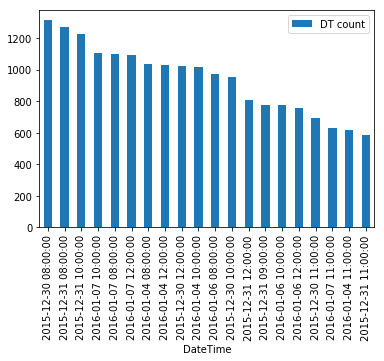

In [97]:
TimeDF.nlargest(20, "DT count", keep='first').plot(kind='bar')

In [74]:
#Add weekday column
Date_time_df['day_of_week'] =pd.to_datetime( Date_time_df['Issue Date']).dt.day_name()
Date_time_df.head()

,Ticket number,Issue Date,Issue time,DateTime,day_of_week
0,1.103341e+09,2015-12-21,12:51:00,2015-12-21 12:51:00,Monday
1,1.103700e+09,2015-12-21,14:35:00,2015-12-21 14:35:00,Monday
2,1.104803e+09,2015-12-21,20:55:00,2015-12-21 20:55:00,Monday
3,1.104821e+09,2015-12-26,15:15:00,2015-12-26 15:15:00,Saturday
4,1.105461e+09,2015-09-15,01:15:00,2015-09-15 01:15:00,Tuesday


In [81]:
Date_time_df['Issue Date']=pd.to_datetime( Date_time_df['Issue Date'])
ModDF=Date_time_df.set_index(["Issue Date"])
ModDF.index

DatetimeIndex(['2015-12-21', '2015-12-21', '2015-12-21', '2015-12-26',
               '2015-09-15', '2015-09-15', '2015-12-17', '2015-12-17',
               '2015-12-22', '2015-12-22',
               ...
               '2015-12-16', '2015-12-02', '2016-01-02', '2015-12-27',
               '2015-12-24', '2016-01-02', '2016-01-02', '2015-12-30',
               '2016-01-08', '2016-01-08'],
              dtype='datetime64[ns]', name='Issue Date', length=49987, freq=None)

In [94]:
MonthlyDF=pd.DataFrame()


In [95]:
 #which month has more citations?
MonthlyDF["Ticket Count"]=ModDF["Ticket number"].resample('M').count()
MonthlyDF.nlargest(20, "Ticket Count", keep='first')
#MonthlyDF.head()

,Ticket Count
Issue Date,
2016-01-31,31794
2015-12-31,17956
2015-11-30,117
2015-09-30,104
2015-01-31,7
2015-08-31,3
2015-10-31,3
2012-12-31,1
2013-01-31,1


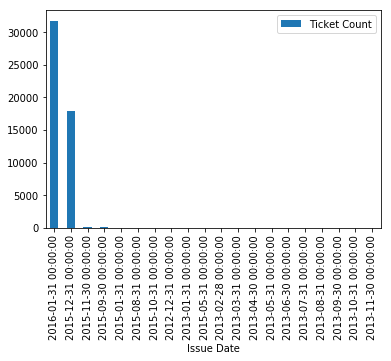

In [91]:
#MonthlyDF Ticket graph
MonthlyDF.nlargest(20, "Ticket Count", keep='first').plot(kind='bar')

In [87]:
#How many tickets are given on an avarage every week

ModDF["Ticket number"].resample('W').count().mean()

314.3836477987421

In [88]:
#How many Max tickets are given on a day
DailyDF=pd.DataFrame()
DailyDF["Ticket count"]=ModDF["Ticket number"].resample('D').count()

#ModDF.nlargest(30,"Ticket count",keep="first")
#DalyDF.nlargest(20,"Ticket count",keep="first").plot(kind='bar')
DailyDF.nlargest(20,"Ticket count",keep="first")

,Ticket count
Issue Date,
2015-12-30,7822
2016-01-07,7815
2016-01-04,7621
2015-12-31,7391
2016-01-06,6660
2016-01-05,5592
2016-01-03,1877
2016-01-08,1044
2016-01-01,938


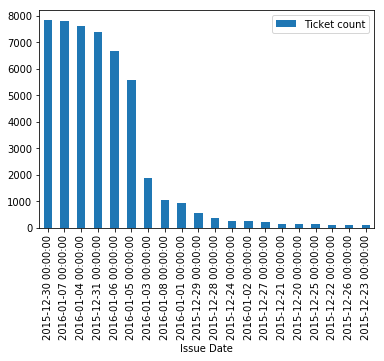

In [90]:
#Daily Ticket graph
DailyDF.nlargest(20,"Ticket count",keep="first").plot(kind='bar')